# Sprator

In this example, we'll try cloning [Sprator](https://github.com/yurkth/sprator) using Seagull. The idea for Sprator is fun and simple:

1. Generate a 4x8 random noise
2. Change the state according to the Conway Rule
3. Repeat steps twice
4. Flip the 4x8 image to create an 8x8 one

In [1]:
# Some settings to show a JS animation
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
%matplotlib inline

In [2]:
import seagull as sg
import seagull.lifeforms as lf

## Creating the lifeform

First, we'll setup the board, of the size 4x8. Then, we'll create a [Custom lifeform](https://pyseagull.readthedocs.io/en/master/notebooks/basic-usage.html#Custom-lifeform) using some random noise. Lastly, we'll add the lifeform onto the board.

In [3]:
board = sg.Board(size=(8,4))

In [4]:
import numpy as np
np.random.seed(42)
noise = np.random.choice([0,1], size=(8,4))
custom_lf = lf.Custom(noise)

In [5]:
board.add(custom_lf, loc=(0,0))

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f1f5cb0dcf8>)

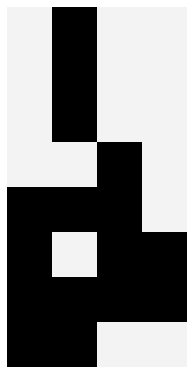

In [6]:
board.view()

## Creating a custom rule

The rule of Sprator is a bit different from Conway's Game of Life, so we'll create a custom function instead. What's cool about the Sprator rule is that all dead cells stay dead and all other live cells die in the next generation. Interesting concept!

In [7]:
import scipy.signal


def count_neighbors(X) -> np.ndarray:
    """Count neighbors for each element in an array"""
    return scipy.signal.convolve2d(X, np.ones((3, 3)), mode="same", boundary="fill") - X


def custom_rule(X) -> np.ndarray:
    """Custom sprator rule"""
    # Count the neighbors for each cell
    n = count_neighbors(X)
    dead_with_less_one_neighbor = (X == 0) & (n <= 1)
    alive_with_two_three_neighbors = (X == 1) & ((n == 2) | (n == 3))
    return dead_with_less_one_neighbor | alive_with_two_three_neighbors

## Running the simulation

Now that we have a board, what's left is to just run the simulation!

In [8]:
sim = sg.Simulator(board)
stats = sim.run(custom_rule, iters=1)  # 1 iteration seems to give better results

2020-03-22 20:54:54.626 | INFO     | seagull.simulator:compute_statistics:128 - Computing simulation statistics...


## Create the Sprite!

In order to create the Sprite, we should get the final step of the simulator (from the history), flip the array, and concatenate them into an 8x8 sprite!


In [9]:
final = sim.get_history()[-1]

In [10]:
sprator = np.hstack([final, np.fliplr(final)])

In [11]:
sprator = np.pad(sprator, mode="constant", pad_width=1, constant_values=1)

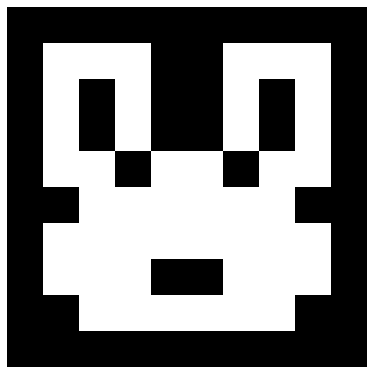

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0, 0, 1 , 1], xticks=[], yticks=[], frameon=False)
im = ax.imshow(sprator, cmap=plt.cm.binary, interpolation="nearest")
im

## Let's add some colors!

Let's put some colors in our sprites by assigning a `fill_color` and an `line_color`

In [13]:
def hex_to_rgb(h):
    """Convert a hex code to an RGB tuple"""
    h_ = h.lstrip("#")
    return tuple(int(h_[i:i+2], 16) for i in (0, 2, 4))

In [14]:
def apply_color(sprite, fill_color, line_color):
    """Apply color to the sprite"""
    sprite_color = [
        (sprite * line) + (np.invert(sprite) * fill)
        for line, fill in zip(hex_to_rgb(line_color), hex_to_rgb(fill_color))
    ]
    return np.rollaxis(np.asarray(sprite_color), 0, 3)

In [15]:
sprite_color = apply_color(sprator, "#0d4d4d", "#ffaaaa")

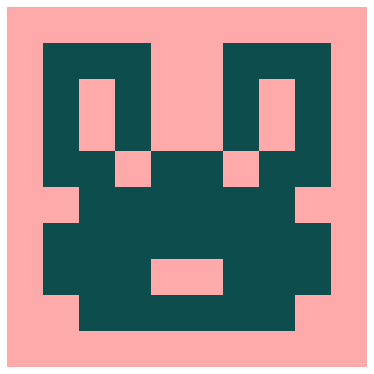

In [16]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0, 0, 1 , 1], xticks=[], yticks=[], frameon=False)
im = ax.imshow(sprite_color)
im